In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Walmart_Store_sales.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.shape

(6435, 8)

In [5]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.duplicated()[df.duplicated()>0]

Series([], dtype: bool)

In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Basic Statistics tasks

In [8]:
#Q1 Which store has maximum sales

In [9]:
Sales_data=df.groupby('Store').sum()['Weekly_Sales']

In [10]:
Sales_data=Sales_data.to_frame()

In [11]:
Sales_data.loc[Sales_data['Weekly_Sales']==Sales_data['Weekly_Sales'].max()]

,Weekly_Sales
Store,
20,3.013978e+08


In [12]:
# So, Store 20 has maximum Sales

In [13]:
#Q2 Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
df.groupby('Store').std()['Weekly_Sales'].sort_values(ascending=False)

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
23    249788.038068
27    239930.135688
2     237683.694682
39    217466.454833
6     212525.855862
35    211243.457791
19    191722.638730
41    187907.162766
28    181758.967539
18    176641.510839
24    167745.677567
11    165833.887863
22    161251.350631
1     155980.767761
12    139166.871880
32    138017.252087
45    130168.526635
21    128752.812853
31    125855.942933
15    120538.652043
40    119002.112858
25    112976.788600
7     112585.469220
17    112162.936087
26    110431.288141
8     106280.829881
34    104630.164676
29     99120.136596
16     85769.680133
9      69028.666585
36     60725.173579
42     50262.925530
3      46319.631557
38     42768.169450
43     40598.413260
5      37737.965745
44     24762.832015
33     24132.927322
30     22809.665590
37     21837.461190
Name: Weekly_Sales, dtype: float64

In [14]:
# So, Store 14 has highest standard deviation

In [15]:
(df.groupby('Store').mean()['Weekly_Sales']/df.groupby('Store').std()['Weekly_Sales']).sort_values(ascending=False)

Store
37    23.761933
30    19.227797
43    15.599741
44    12.225939
31    11.091264
42    11.069866
33    10.767931
1      9.970873
34     9.239989
26     9.081773
38     9.019129
3      8.694034
8      8.550456
32     8.452336
5      8.426840
11     8.179167
2      8.102160
40     8.101772
24     8.088169
17     7.966815
9      7.880502
4      7.868902
20     7.639263
13     7.546394
19     7.536924
27     7.398888
6      7.362531
28     7.281744
12     7.250300
41     6.748681
39     6.670767
22     6.378248
14     6.363884
10     6.284032
25     6.255458
36     6.150859
18     6.140790
16     6.053978
45     6.038183
21     5.872253
23     5.564175
29     5.442400
15     5.171059
7      5.068303
35     4.353863
Name: Weekly_Sales, dtype: float64

In [16]:
# So,store 37 has highest coef of mean to standard deviation

In [17]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [18]:
#Q3 Which store/s has good quarterly growth rate in Q3’2012
import datetime as dt

In [19]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [20]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [21]:
Q2_2012_Sales=df.loc[(df['Date']>='2012-04-01') & (df['Date']<='2012-06-30')]

In [22]:
Q2SALE2012=Q2_2012_Sales.groupby('Store').sum()['Weekly_Sales']

In [23]:
Q3_2012_Sales=df.loc[(df['Date']>='2012-07-01') & (df['Date']<='2012-09-30')]

In [24]:
Q3SALE2012=Q3_2012_Sales.groupby('Store').sum()['Weekly_Sales']

In [25]:
type(Q3SALE2012)

pandas.core.series.Series

In [26]:
Growth_Perc=((Q3SALE2012-Q2SALE2012)/Q2SALE2012)*100

In [27]:
Growth_Perc.sort_values(ascending=False)

Store
7     13.330776
16     8.488378
35     4.466637
26     3.955478
39     2.478404
41     2.456980
44     2.434638
24     1.652088
40     1.142841
23     0.825395
38    -0.575326
32    -0.598751
19    -0.891505
17    -1.055779
37    -1.413736
8     -1.431909
11    -1.525186
27    -1.918313
43    -2.059831
13    -2.176842
25    -2.294647
20    -2.298597
4     -2.310968
31    -2.521038
30    -2.570609
28    -2.581880
34    -2.860067
21    -2.872605
18    -2.924753
10    -3.002523
2     -3.110598
6     -3.199580
33    -3.251057
1     -3.454982
42    -3.587095
15    -4.313659
22    -4.765417
3     -5.734749
12    -6.182010
9     -6.182893
29    -6.372684
5     -6.774475
36    -7.714369
45    -7.790564
14   -15.773764
Name: Weekly_Sales, dtype: float64

In [28]:
# Store 7 has highest Growth in Q3 2012

In [29]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [30]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [31]:
# #Q4 Some holidays have a negative impact on sales. 
# Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
Super_Bowl =['2010-02-12', '2011-02-11', '2012-2-10']
Labour_Day =  ['2010-09-10', '2011-9-09', '2012-9-07']
Thanksgiving =  ['2010-11-26', '2011-11-25', '2012-11-22']
Christmas = ['2010-12-31', '2011-12-30', '2012-12-28']

In [32]:
Super_Bowl_Sales=df.loc[df['Date'].isin(Super_Bowl)]['Weekly_Sales'].mean()
Super_Bowl_Sales

1079127.9877037033

In [33]:
Labour_Day_Sales=df.loc[df['Date'].isin(Labour_Day)]['Weekly_Sales'].mean()
Labour_Day_Sales

1042427.2939259257

In [34]:
Thanksgiving_Sales=df.loc[df['Date'].isin(Thanksgiving)]['Weekly_Sales'].mean()
Thanksgiving_Sales

1471273.427777778

In [35]:
Christmas_Sales=df.loc[df['Date'].isin(Christmas)]['Weekly_Sales'].mean()
Christmas_Sales

960833.1115555551

In [36]:
df.loc[df['Date'].isin(Super_Bowl)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742
105,1,2012-02-10,1802477.43,1,48.02,3.409,220.265178,7.348
144,2,2010-02-12,2137809.50,1,38.49,2.548,210.897994,8.324
196,2,2011-02-11,2168041.61,1,33.19,3.022,212.592862,8.028
...,...,...,...,...,...,...,...,...
6202,44,2011-02-11,307486.73,1,30.83,3.034,127.859129,7.224
6254,44,2012-02-10,325377.97,1,33.73,3.116,130.384903,5.774
6293,45,2010-02-12,656988.64,1,27.73,2.773,181.982317,8.992
6345,45,2011-02-11,766456.00,1,30.30,3.239,183.701613,8.549


In [37]:
Non_Holiday_Sales=df.loc[~df['Date'].isin(['2010-02-12', '2011-02-11', '2012-2-10','2010-09-10', '2011-9-09', '2012-9-07','2010-11-26', '2011-11-25', '2012-11-22','2010-12-31', '2011-12-30', '2012-12-28'])]['Weekly_Sales'].mean()

In [38]:
{'Super_Bowl_Sales':Super_Bowl_Sales,'Labour_Day_Sales':Labour_Day_Sales,'Thanksgiving_Sales':Thanksgiving_Sales,'Christmas_Sales':Christmas_Sales,'Non_Holiday_Sales':Non_Holiday_Sales}

{'Super_Bowl_Sales': 1079127.9877037033,
 'Labour_Day_Sales': 1042427.2939259257,
 'Thanksgiving_Sales': 1471273.427777778,
 'Christmas_Sales': 960833.1115555551,
 'Non_Holiday_Sales': 1041256.3802088564}

In [39]:
# So,Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales are higher than Non_Holiday_Sales

In [40]:
#Q5 Provide a monthly and semester view of sales in units and give insights
df['Month']=df['Date'].dt.month

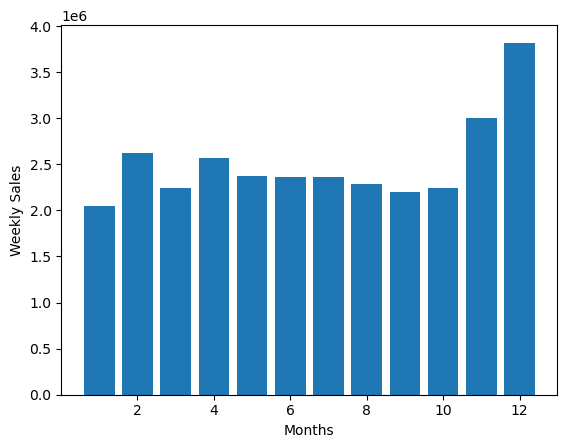

In [41]:
plt.bar(df['Month'],df['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly Sales')
plt.show()

In [42]:
# Overall monthly Sales are higher in month of December

In [43]:
df['Year']=df['Date'].dt.year

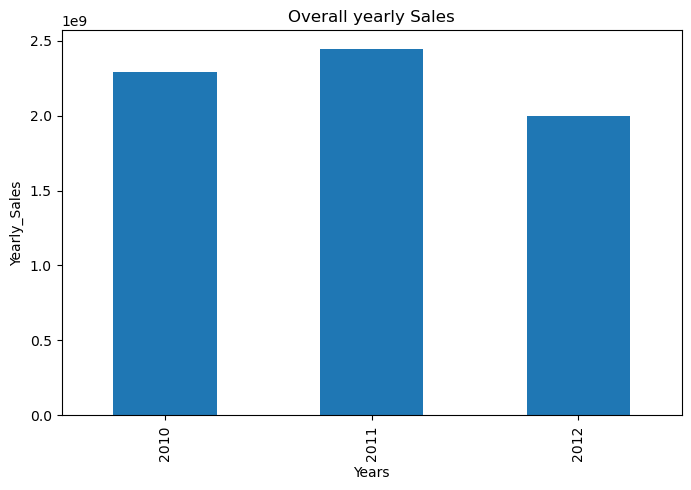

In [44]:
plt.figure(figsize=(8,5))
df.groupby('Year')['Weekly_Sales'].sum().plot.bar()
plt.xlabel('Years')
plt.ylabel('Yearly_Sales')
plt.title('Overall yearly Sales')
plt.show()

In [45]:
#Sales are higher in 2011 as compared to 2010 and 2012

# Statistical Model

<AxesSubplot:>

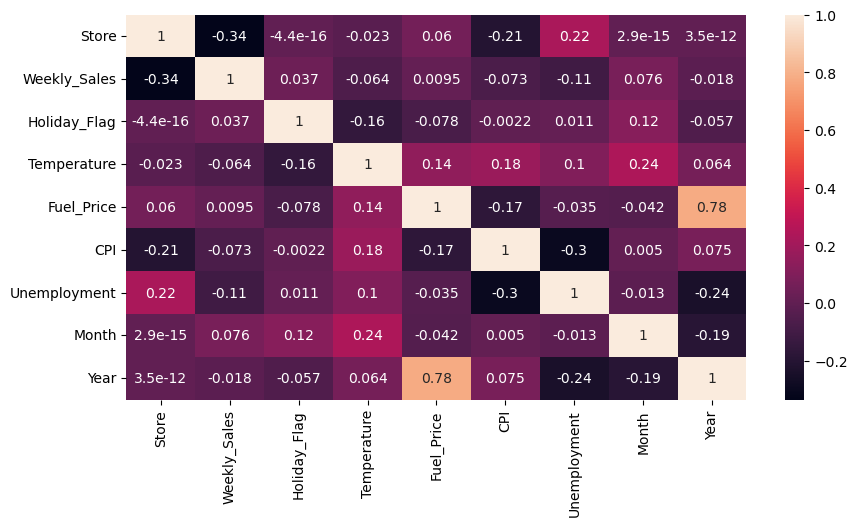

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [47]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year'],
      dtype='object')

In [48]:
columns=df[['Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']]

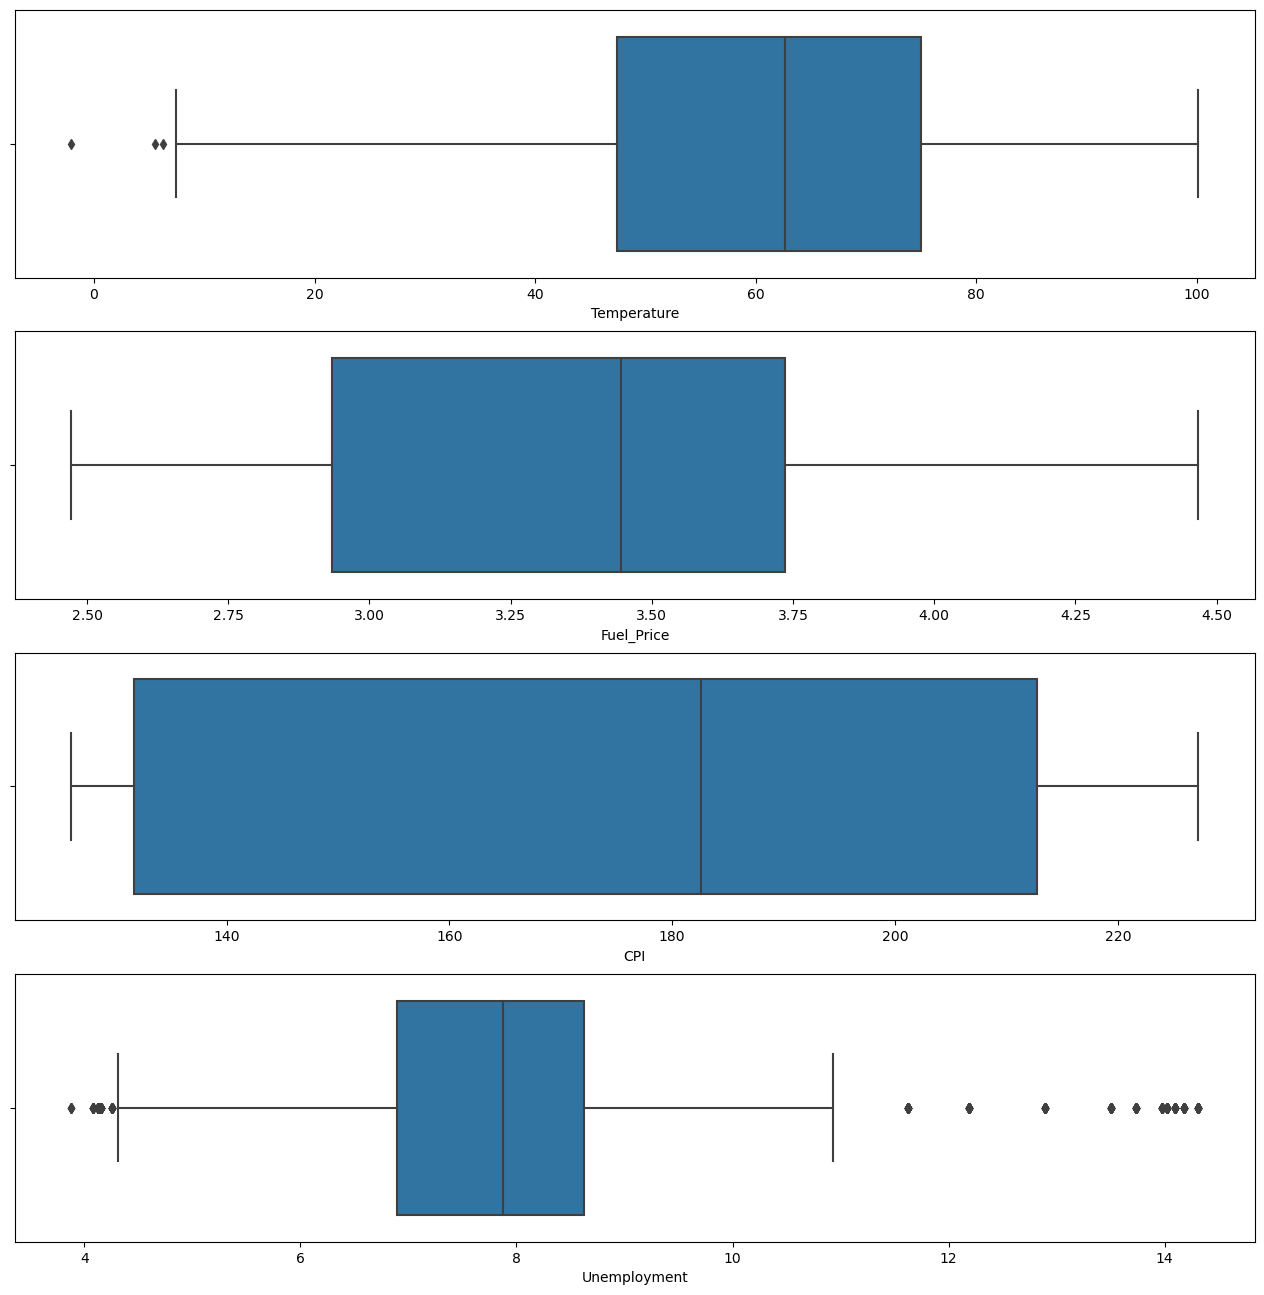

In [49]:
fig, axis = plt.subplots(4,figsize=(16,16))
for i,col in enumerate(columns):
    sns.boxplot(df[col],ax=axis[i])

In [50]:
New_df=df.loc[(df['Temperature']>10) & (df['Unemployment']>4.5) & (df['Unemployment']<11)]

In [51]:
New_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010


In [52]:
New_df.shape

(5909, 10)

In [53]:
#Q6 Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [54]:
New_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
count,5909.000000,5.909000e+03,5909.000000,5909.00000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000
mean,22.745981,1.047300e+06,0.070063,60.40418,3.338254,175.211281,7.742753,6.460653,2010.953461
std,13.077381,5.707495e+05,0.255274,18.36394,0.458496,39.019601,1.216529,3.229647,0.795872
min,1.000000,2.099862e+05,0.000000,10.09000,2.472000,126.064000,4.584000,1.000000,2010.000000
25%,11.000000,5.519691e+05,0.000000,46.94000,2.886000,132.763355,6.901000,4.000000,2010.000000
50%,22.000000,9.478151e+05,0.000000,62.54000,3.415000,190.294824,7.852000,7.000000,2011.000000
75%,34.000000,1.431003e+06,0.000000,74.69000,3.720000,213.811666,8.494000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.14000,4.468000,227.232807,10.926000,12.000000,2012.000000


In [55]:
#Q7 Change dates into days by creating new variable.
New_df['Day']=New_df['Date'].dt.day

In [56]:
New_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,5
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19


In [57]:
#So, as per descriptive analysis Weekly sales should be standardized

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
New_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year', 'Day'],
      dtype='object')

In [60]:
features=New_df[['Store','Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year', 'Day']]
target=New_df[['Weekly_Sales']]

In [61]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=1)

In [62]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4136, 9), (1773, 9), (4136, 1), (1773, 1))

In [63]:
Lin_model=LinearRegression()

In [64]:
Lin_model.fit(X_train,y_train)

LinearRegression()

In [65]:
Pred=Lin_model.predict(X_test)

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

In [67]:
print("Mean absolute error of Linear Regression model is :",mean_absolute_error(y_test,Pred))

Mean absolute error of Linear Regression model is : 444365.9135017338


In [68]:
print("Mean square error of Linear Regression model is :",mean_squared_error(y_test,Pred))

Mean square error of Linear Regression model is : 286685214571.3847


In [69]:
print("Root Mean square error of Linear Regression model is :",np.sqrt(mean_squared_error(y_test,Pred)))

Root Mean square error of Linear Regression model is : 535429.9343251035


In [70]:
print('Accuracy of Linear Regression model is:',Lin_model.score(X_test,y_test)*100)

Accuracy of Linear Regression model is: 12.683006270158359


# Select the model which gives best accuracy.

In [71]:
from sklearn.linear_model import Lasso

In [72]:
lasso=Lasso(alpha=0.1)

In [73]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [74]:
Pred_lasso=lasso.predict(X_test)

In [75]:
print("Mean square error of Lasso model is :",mean_squared_error(y_test,Pred_lasso))

Mean square error of Lasso model is : 286685228496.6631


In [76]:
print('Accuracy of Linear Regression model is:',lasso.score(X_test,y_test)*100)

Accuracy of Linear Regression model is: 12.683002028874258


In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
RF_model=RandomForestRegressor()

In [79]:
RF_model.fit(X_train,y_train)

RandomForestRegressor()

In [80]:
print('Accuracy of Linear Regression model is:',RF_model.score(X_test,y_test)*100)

Accuracy of Linear Regression model is: 94.7534379651797


In [81]:
# So, Random forest Regressor model is best model